<a href="https://colab.research.google.com/github/DabanAbdullah/DabanAbdullah/blob/main/CUQCharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl matplotlib pandas

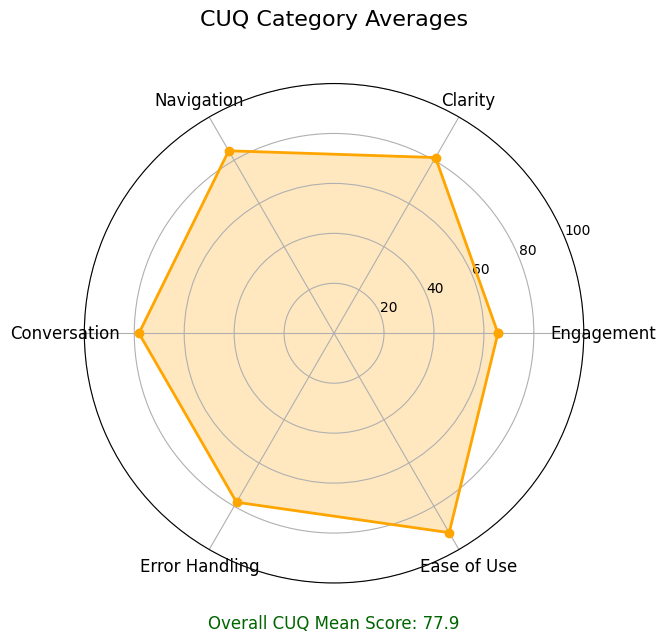

In [11]:
# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 📂 Load Excel file (already present in the Colab environment)
file_path = "CUQ1-Calculation-Tool.xlsx"  # Ensure this file is in your Colab files

# 📊 Load and clean data
df = pd.read_excel(file_path, sheet_name="Data", skiprows=5)
df = df.dropna(how='all', axis=1).dropna(how='all', axis=0)
df.columns = ['Index'] + [f"Q{i+1}" for i in range(len(df.columns) - 1)]
df = df.reset_index(drop=True)

# Convert to numeric and drop incomplete responses
df_clean = df.dropna()
for col in df_clean.columns[1:]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# ✅ Question-to-category mapping and reverse scoring flags
questions = {
    'Q1': {'cat': 'Engagement', 'reverse': False},
    'Q2': {'cat': 'Engagement', 'reverse': True},
    'Q3': {'cat': 'Engagement', 'reverse': False},
    'Q4': {'cat': 'Engagement', 'reverse': True},
    'Q5': {'cat': 'Clarity', 'reverse': False},
    'Q6': {'cat': 'Clarity', 'reverse': True},
    'Q7': {'cat': 'Navigation', 'reverse': False},
    'Q8': {'cat': 'Navigation', 'reverse': True},
    'Q9': {'cat': 'Conversation', 'reverse': False},
    'Q10': {'cat': 'Conversation', 'reverse': True},
    'Q11': {'cat': 'Conversation', 'reverse': False},
    'Q12': {'cat': 'Conversation', 'reverse': True},
    'Q13': {'cat': 'Error Handling', 'reverse': False},
    'Q14': {'cat': 'Error Handling', 'reverse': True},
    'Q15': {'cat': 'Ease of Use', 'reverse': False},
    'Q16': {'cat': 'Ease of Use', 'reverse': True},
}

# 🔁 Apply reverse scoring (1–5 scale => 5–1)
adjusted_scores = df_clean.copy()
for q, meta in questions.items():
    if meta['reverse']:
        adjusted_scores[q] = 6 - adjusted_scores[q]

# 🟠 Scale to 0–100
for q in questions:
    adjusted_scores[q] = (adjusted_scores[q] - 1) * 25

# 📈 Compute average score per category
category_scores = {}
for q, meta in questions.items():
    cat = meta['cat']
    if cat not in category_scores:
        category_scores[cat] = []
    category_scores[cat].append(adjusted_scores[q])

category_avg = {cat: np.mean(vals) for cat, vals in category_scores.items()}

# 📊 Compute total CUQ mean score
overall_mean_score = adjusted_scores[[q for q in questions]].mean().mean()

# 🌐 Radar chart plotting
labels = list(category_avg.keys())
scores = list(category_avg.values())
num_vars = len(labels)

# Complete loop for radar
scores += scores[:1]
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 📊 Radar chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.plot(angles, scores, 'o-', linewidth=2, color='orange')
ax.fill(angles, scores, color='orange', alpha=0.25)

# 🏷️ Labels and styling
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'])
ax.set_title("CUQ Category Averages", y=1.1, fontsize=16)

# ➕ Show mean score
plt.figtext(0.5, -0.05, f"Overall CUQ Mean Score: {overall_mean_score:.1f}",
            ha='center', fontsize=12, color='darkgreen')

plt.tight_layout()
plt.show()